### IMPORTING LIBRARIES

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### More information
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

### IMPORT DATA

In [144]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### DATA PREPROCESSING

In [145]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### DATA VISUALIZATION

In [147]:
df['Churn'].value_counts()  # churn = 1, not churn = 0

No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Churn Count')

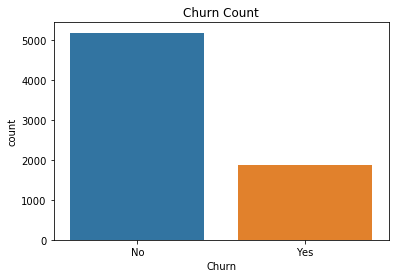

In [150]:
sns.countplot(x='Churn', data=df).set_title('Churn Count')

In [152]:
print('percentage of churn customer is  ',5174*100/(5174+1869))
print('percentage of not churn customer is  ',1869*100/(5174+1869))

percentage of churn customer is   73.46301292063042
percentage of not churn customer is   26.536987079369588


Imbalance dataset churn

HIGH CHANCE OF CHURN PROBABILITY

[Text(0.5, 1.0, 'Relationship between tenure and churn')]

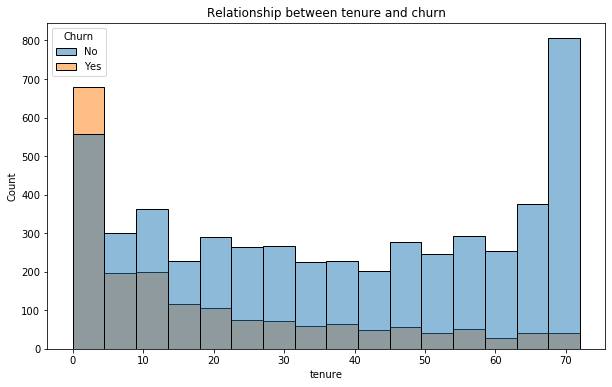

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.histplot(data=df, x='tenure', hue='Churn').set(title='Relationship between tenure and churn')

This graph show that as long as the customer stick to the product company, The less customer will churn.

[Text(0.5, 1.0, 'Relation between Contract and Churn')]

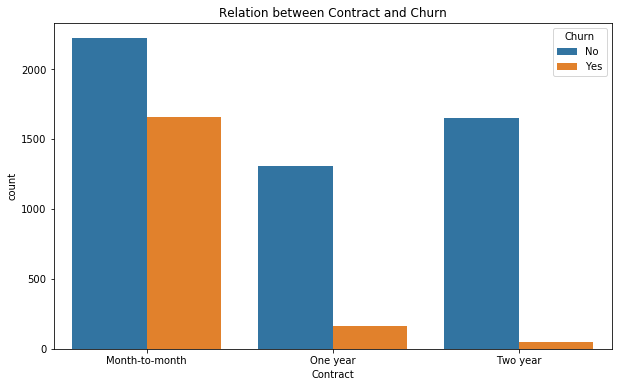

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Contract', hue='Churn').set(title='Relation between Contract and Churn')

This plot show that longer contract term has more probability to be not churn customer.

let look more deeply on customer MoM contract. 

In [ ]:
df[df['Contract'] == 'Month-to-month']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


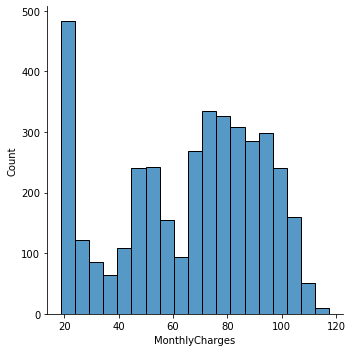

In [ ]:
sns.displot(data=df[df['Contract'] == 'Month-to-month'],x='MonthlyCharges')

[Text(0.5, 1.0, 'Relation between OnlineSecurity and Churn')]

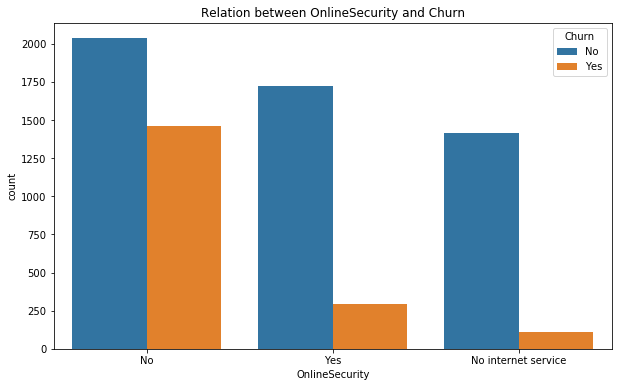

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='OnlineSecurity', hue='Churn').set(title='Relation between OnlineSecurity and Churn')

This plot show that Non internet service has less customer churn. The service with OnlineSecurity has less churn compare with the service without OnlineSecurity.
Company has to look on customer that doesn't have OnlineSecurity. Maybe the service that with no Online Security has a problem.


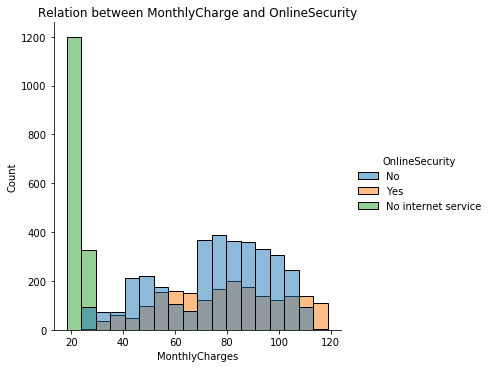

In [ ]:
sns.displot(df, x="MonthlyCharges", hue="OnlineSecurity").set(title='Relation between MonthlyCharge and OnlineSecurity')

[Text(0.5, 1.0, 'Relation between MonthlyCharge and Churn')]

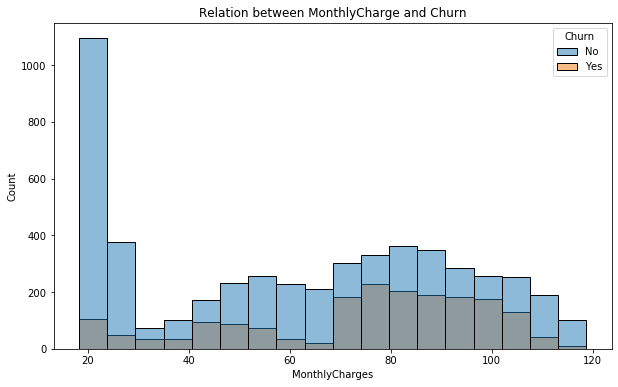

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn').set(title='Relation between MonthlyCharge and Churn')

[Text(0.5, 1.0, 'Relation between SeniorCitizen and Churn')]

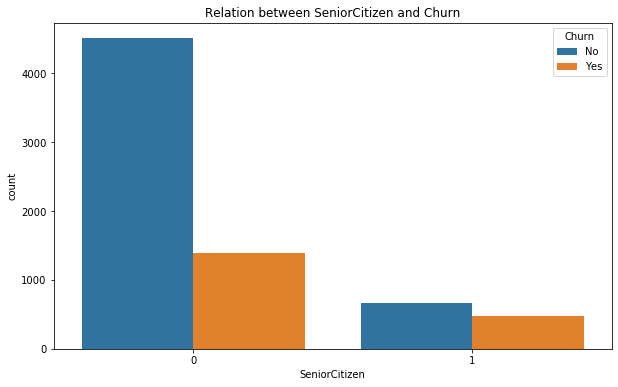

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn').set(title='Relation between SeniorCitizen and Churn')
#Senior Citizen: Indicates if the customer is 65 or older: Yes, No

(imbalance dataset!!!) This Plot show that customer who is  <= 65 is more likely to be churn. senior citizen have less information.

[Text(0.5, 1.0, 'Relation between PaymentMethod and Churn')]

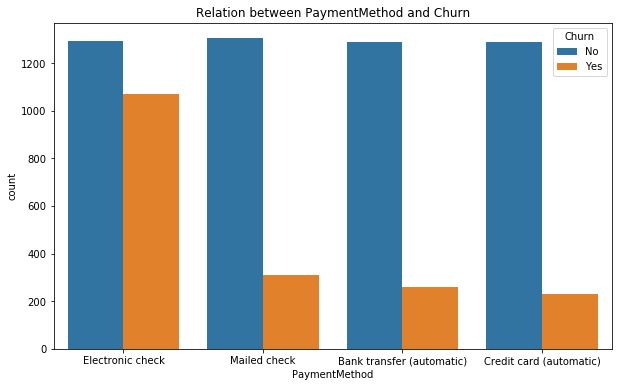

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='PaymentMethod', hue='Churn').set(title='Relation between PaymentMethod and Churn')

This Plot indicate that most of the customer is use electronic check. company has to observe deeply why electronic check has more churn rate than other payment method.

[Text(0.5, 1.0, 'Relation between InternetService and Churn')]

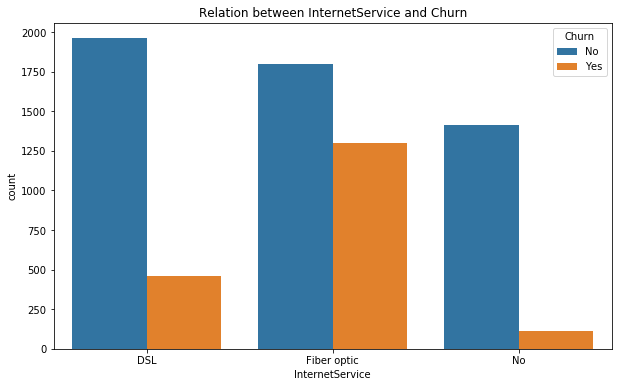

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='InternetService', hue='Churn').set(title='Relation between InternetService and Churn')

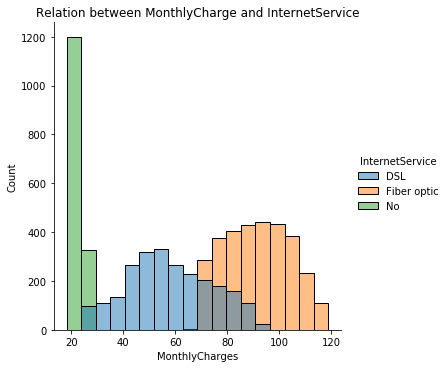

In [ ]:
sns.displot(df, x="MonthlyCharges", hue="InternetService").set(title='Relation between MonthlyCharge and InternetService')

[Text(0.5, 1.0, 'Relation between OnlineBackup and Churn')]

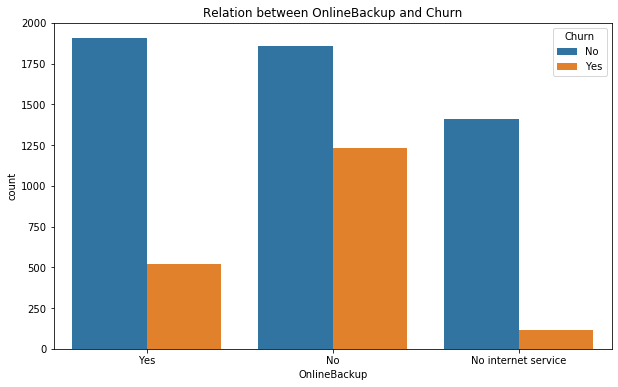

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='OnlineBackup', hue='Churn').set(title='Relation between OnlineBackup and Churn')

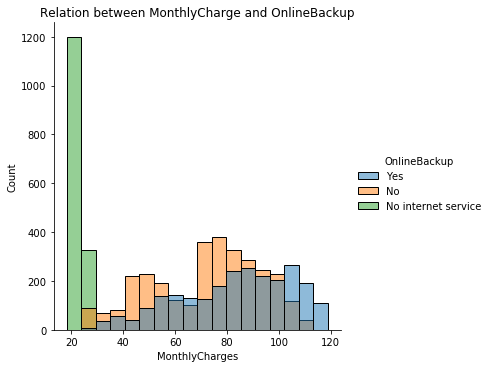

In [ ]:
sns.displot(df, x="MonthlyCharges", hue="OnlineBackup").set(title='Relation between MonthlyCharge and OnlineBackup')

[Text(0.5, 1.0, 'Relation between DeviceProtection and Churn')]

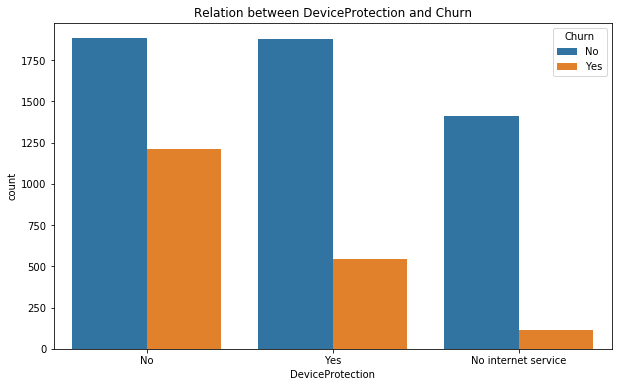

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='DeviceProtection', hue='Churn').set(title='Relation between DeviceProtection and Churn')

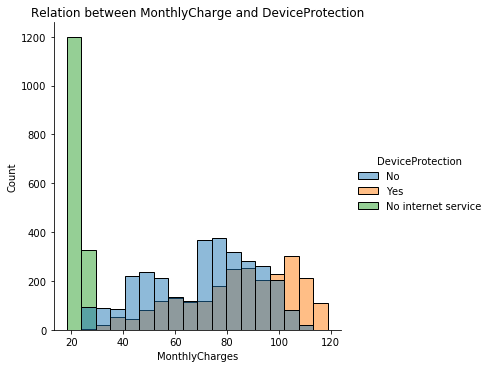

In [ ]:
sns.displot(df, x="MonthlyCharges", hue="DeviceProtection").set(title='Relation between MonthlyCharge and DeviceProtection')

[Text(0.5, 1.0, 'Relation between TechSupport and Churn')]

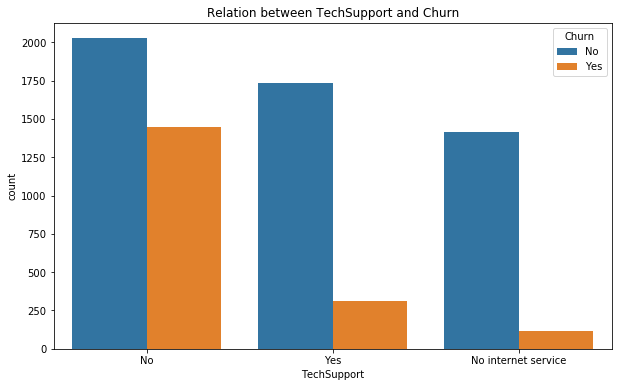

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='TechSupport', hue='Churn').set(title='Relation between TechSupport and Churn')

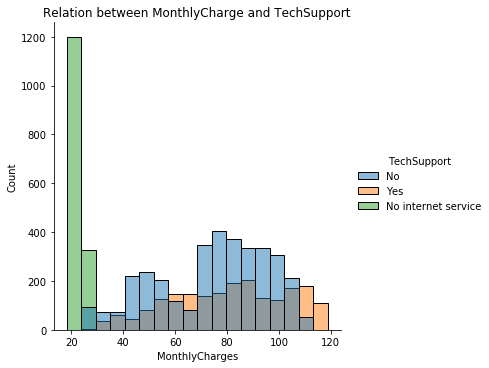

In [ ]:
sns.displot(df, x="MonthlyCharges", hue="TechSupport").set(title='Relation between MonthlyCharge and TechSupport')

[Text(0.5, 1.0, 'Relation between Dependents and Churn')]

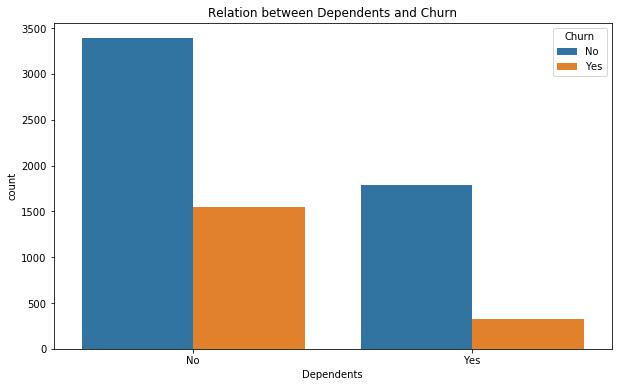

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dependents', hue='Churn').set(title='Relation between Dependents and Churn')

NOT SURE IF CHURN PROBABILITY

[Text(0.5, 1.0, 'Relation between TechSupport and Churn')]

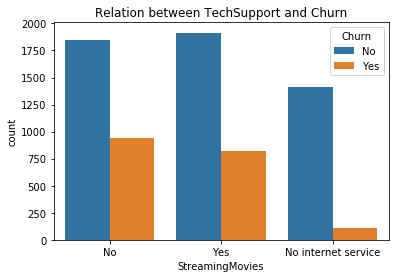

In [ ]:
sns.countplot(data=df, x='StreamingMovies', hue='Churn').set(title='Relation between TechSupport and Churn')

[Text(0.5, 1.0, 'Relation between StreamingTV and Churn')]

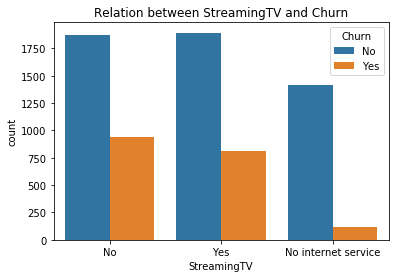

In [ ]:
sns.countplot(data=df, x='StreamingTV', hue='Churn').set(title='Relation between StreamingTV and Churn')

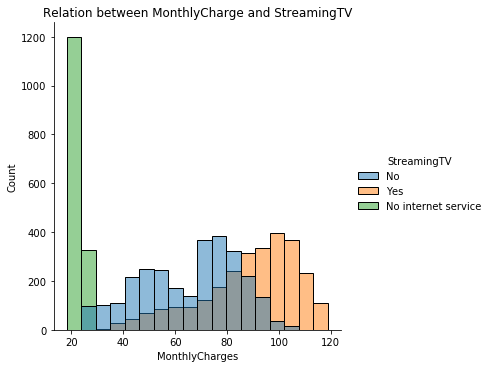

In [ ]:
sns.displot(df, x="MonthlyCharges", hue="StreamingTV").set(title='Relation between MonthlyCharge and StreamingTV')

[Text(0.5, 1.0, 'Relation between MultipleLines and Churn')]

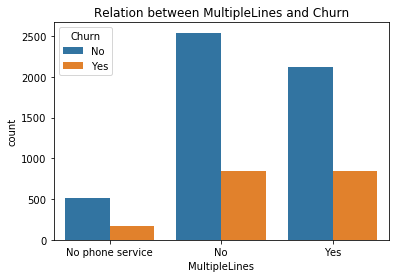

In [ ]:
sns.countplot(data=df, x='MultipleLines', hue='Churn').set(title='Relation between MultipleLines and Churn')

[Text(0.5, 1.0, 'Relation between PhoneService and Churn')]

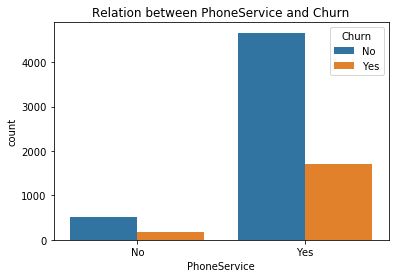

In [ ]:
sns.countplot(data=df, x='PhoneService', hue='Churn').set(title='Relation between PhoneService and Churn')

[Text(0.5, 1.0, 'Relation between PaperlessBilling and Churn')]

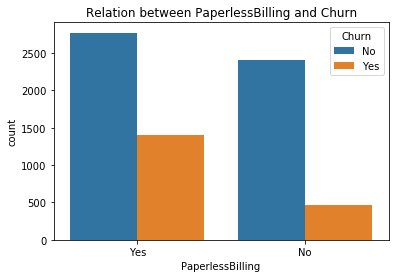

In [ ]:
sns.countplot(data=df, x='PaperlessBilling', hue='Churn').set(title='Relation between PaperlessBilling and Churn')

In [ ]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

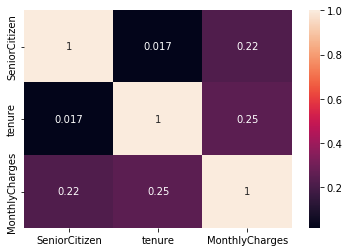

In [ ]:
sns.heatmap(df.corr(), annot=True)

TRY EXPLORATION DATA

In [ ]:
df['InternetService'].groupby(df['Churn']).value_counts()

Churn  InternetService
No     DSL                1962
       Fiber optic        1799
       No                 1413
Yes    Fiber optic        1297
       DSL                 459
       No                  113
Name: InternetService, dtype: int64

In [ ]:
df['OnlineSecurity'].groupby(df['Churn']).value_counts()

Churn  OnlineSecurity     
No     No                     2037
       Yes                    1724
       No internet service    1413
Yes    No                     1461
       Yes                     295
       No internet service     113
Name: OnlineSecurity, dtype: int64

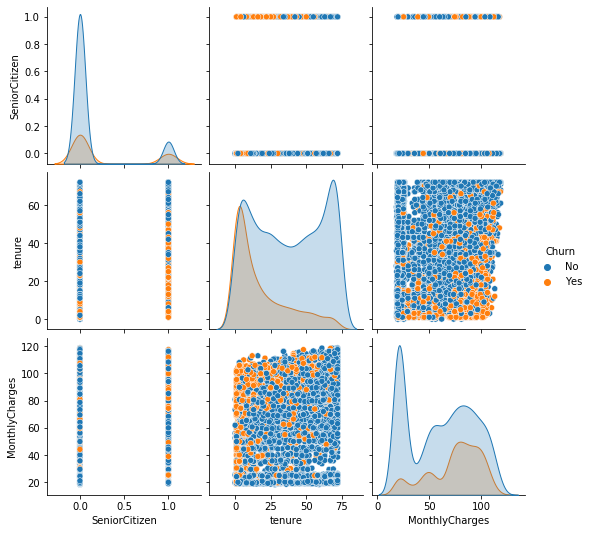

In [ ]:
sns.pairplot(df, hue='Churn')

In [ ]:
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
#from sklearn.ensemble import RandomForestClassifier